In [2]:
import numpy as np
import matplotlib.pyplot as plt


Illustrate that the matrix is used to rotate and scale the vector

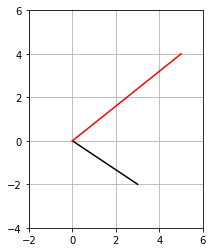

In [7]:
v = np.array([3,-2])
A = np.array([[1,-1],[2,1]])
w = A@np.matrix.transpose(v)

plt.plot([0, v[0]], [0, v[1]], 'k', label='v1')
plt.plot([0, w[0]], [0, w[1]], 'r', label='v2')

plt.axis('square')
plt.axis((-2,6,-4,6))
plt.grid()
plt.show()

illustrate that the matrix is only used to rotate and not to scale (pure rotation matrix)

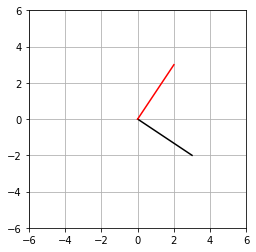

In [16]:
theta = np.pi/2
v = np.array([3,-2])
A = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])

w = A@np.matrix.transpose(v)


plt.plot([0, v[0]], [0, v[1]], 'k', label='v1')
plt.plot([0, w[0]], [0, w[1]], 'r', label='v2')

plt.axis('square')
plt.axis((-6,6,-6,6))
plt.grid()
plt.show()

Code challenge: pure and impure rotation
---



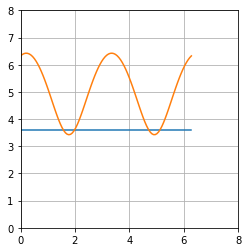

In [38]:
thetas = np.linspace(0, 2*np.pi, 100)
result = np.zeros((thetas.size,2))


for n in range(thetas.size):
    theta = thetas[n]
    v = np.array([3,-2])
    A = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    AI = np.array([[2*np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    
    w = A@np.matrix.transpose(v)
    wi = AI@np.matrix.transpose(v)
    
    mag = np.linalg.norm(w)
    magi= np.linalg.norm(wi)
    
    result[n, 0] = mag  
    result[n, 1] = magi
    
plt.plot(thetas, result)
plt.axis('square')
plt.axis((0,8,0,8))
plt.grid()
plt.show()

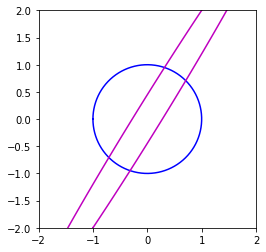

In [70]:
x = np.linspace(-np.pi, np.pi, 100);
xy = np.matrix.transpose(np.array([np.cos(x), np.sin(x)]))

plt.plot(xy[:,0], xy[:,1], 'b')

T = np.array([[1,2],[2,3]])
newXy = xy@T

plt.plot(newXy[:,0], newXy[:,1], 'm')
plt.axis('square')
plt.axis((-2,2,-2,2))
plt.show()


Multiplicative and Additive identity matrices
---

In [19]:

n = 4
A = np.round(10*np.random.randn(n,n))
I = np.eye(n)
Z = np.zeros([n,n])

print(A)
print(A@I)
print(A+I)

print(A@Z)
print(A+Z)

[[  5.   1.  11.  -3.]
 [-23.   3.  15. -13.]
 [ -0.  14.   0.   6.]
 [  8. -12. -20. -15.]]
[[  5.   1.  11.  -3.]
 [-23.   3.  15. -13.]
 [  0.  14.   0.   6.]
 [  8. -12. -20. -15.]]
[[  6.   1.  11.  -3.]
 [-23.   4.  15. -13.]
 [  0.  14.   1.   6.]
 [  8. -12. -20. -14.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[  5.   1.  11.  -3.]
 [-23.   3.  15. -13.]
 [  0.  14.   0.   6.]
 [  8. -12. -20. -15.]]



Matrix symmetry
---


In [27]:
n = 5
m = 3

#additive

A = np.round(10 * np.random.randn(n,n))

S = A + np.transpose(A)

print(S)

# multiplicative

B = np.round(10 * np.random.randn(n,m))

Sn = B@np.transpose(B)
print(Sn)

Sm = np.transpose(B)@B
print(Sm)

[[ -8. -11.  12.   1.   0.]
 [-11.  22.  -7. -16.   1.]
 [ 12.  -7.  32.  27.  -1.]
 [  1. -16.  27. -22. -28.]
 [  0.   1.  -1. -28.   6.]]
[[  81.  -71.  -67.  118.  100.]
 [ -71.  257. -139. -222.    0.]
 [ -67. -139.  395. -187.  -55.]
 [ 118. -222. -187.  561.  -84.]
 [ 100.    0.  -55.  -84.  261.]]
[[335. -45.  43.]
 [-45. 550. 131.]
 [ 43. 131. 670.]]


Code challenge
---


In [31]:
n = 4
# 2 symmetric matrices
A = np.round(10 * np.random.randn(n,n))
B = np.round(10 * np.random.randn(n,n))

AS = A@np.transpose(A)
BS = B@np.transpose(B)

# compute sum and multiplication and hadamard multiplication
SUM = AS + BS
MM = AS@BS
HM = np.multiply( AS,BS )

# determine if result is still symmetric

print("\nsum\n---\n")
print(SUM)
print(SUM - np.transpose(SUM))

print("\nmatrix multi\n---\n")
print(MM)
print(MM - np.transpose(MM))

print("\nhadamard multi\n---\n")
print(HM)
print(HM - np.transpose(HM))


sum
---

[[1293.  -52.   14.  252.]
 [ -52.  481. -129.    9.]
 [  14. -129.  638. -189.]
 [ 252.    9. -189.  479.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

matrix multi
---

[[289904. 133156.  15174. -35290.]
 [-70748. -19966.  -1436.  16988.]
 [  1940. -21922.  60671. -18001.]
 [133686.  75266. -12884.  -2900.]]
[[      0.  203904.   13234. -168976.]
 [-203904.       0.   20486.  -58278.]
 [ -13234.  -20486.       0.   -5117.]
 [ 168976.   58278.    5117.       0.]]

hadamard multi
---

[[393156. -47724.  -2760. -52768.]
 [-47724.  51198.  -9180. -14260.]
 [ -2760.  -9180.  65661.   6950.]
 [-52768. -14260.   6950.  57178.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Code challenge
---


In [38]:
n = 4

F = np.round(10 * np.random.randn(n,n))
D = np.diag(np.round(10 * np.random.randn(n)))

print(D)

FF = F@F
FFH = np.multiply(F,F)
DD = D@D
DDH = np.multiply(D,D)

print("\nmultiply by itself\n---\n")
print(FF)
print("\nmultiply by itself (hadamard)\n---\n")
print(FFH)

print("\nmultiply diagonal\n---\n")
print(DD)
print("\nmultiply diagonal (hadamard)\n---\n")
print(DDH)

[[ 6.  0.  0.  0.]
 [ 0. -3.  0.  0.]
 [ 0.  0. -4.  0.]
 [ 0.  0.  0. -3.]]

multiply by itself
---

[[ 103.  308.  175.  289.]
 [-306.  165.  157.  169.]
 [-180. -254.  150.  254.]
 [ 396.  128.  -14.  221.]]

multiply by itself (hadamard)
---

[[  4.   1.  25. 324.]
 [ 81. 324.  49.  49.]
 [324.  64. 144.   4.]
 [  0. 256. 196. 361.]]

multiply diagonal
---

[[36.  0.  0.  0.]
 [ 0.  9.  0.  0.]
 [ 0.  0. 16.  0.]
 [ 0.  0.  0.  9.]]

multiply diagonal (hadamard)
---

[[36.  0.  0.  0.]
 [ 0.  9.  0.  0.]
 [ 0.  0. 16.  0.]
 [ 0.  0.  0.  9.]]


---
Code challenge (Fourier Transform)
---


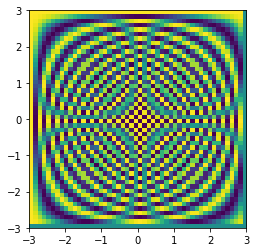

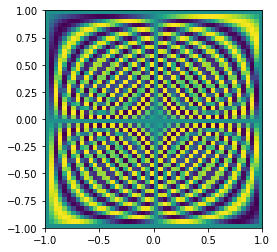

In [10]:

import matplotlib.cm as cm

n = 50

F = np.zeros((n,n), dtype=complex)
w = np.exp(-2*np.pi*1j/n)
 
for j in range(n-1):
    for k in range(n-1):
        m = j*k;
        F[j,k] = np.power(w,m)

fig, ax = plt.subplots()
im = ax.imshow(np.real(F),  extent=[-3,3,-3,3])
plt.show()

fig2, ax2 = plt.subplots()
im2 = ax2.imshow(np.imag(F),  extent=[-1,1,-1,1])
plt.show()


v = np.random.randn(n)
X = F@np.transpose(v)

Frobinius dot product

In [43]:
# any matrix sizes
m = 9
n = 4

# but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# first vectorize, then vector-dot-product
Av = np.reshape( A,m*n, order='F' ) # order='F' reshapes by columns instead of by rows
Bv = np.reshape( B,m*n, order='F' )
frob_dp = np.dot( Av,Bv )

# trace method
frob_dp2 = np.trace( np.matrix.transpose(A)@B )
print(frob_dp2)
print(frob_dp)

# matrix norm
Anorm  = np.linalg.norm(A,'fro')
Anorm2 = np.sqrt( np.trace( np.matrix.transpose(A)@A ) )
print(Anorm)
print(Anorm2)


3.0719207713405354
3.071920771340535
5.7548324137229505
5.7548324137229505
